In [1]:
import numpy as np
from numpy.random import normal 
import pandas as pd
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.formula.api import ols
from TOBIT import *
from OPROBIT import *
import wooldridge as woo
import scipy.stats as stats

# Ordered Probit Slides and Exercise 1 of Interactive

In [2]:
mroz=woo.data('mroz')
woo.data('mroz',description=True)

name of dataset: mroz
no of variables: 22
no of observations: 753

+----------+---------------------------------+
| variable | label                           |
+----------+---------------------------------+
| inlf     | =1 if in lab frce, 1975         |
| hours    | hours worked, 1975              |
| kidslt6  | # kids < 6 years                |
| kidsge6  | # kids 6-18                     |
| age      | woman's age in yrs              |
| educ     | years of schooling              |
| wage     | est. wage from earn, hrs        |
| repwage  | rep. wage at interview in 1976  |
| hushrs   | hours worked by husband, 1975   |
| husage   | husband's age                   |
| huseduc  | husband's years of schooling    |
| huswage  | husband's hourly wage, 1975     |
| faminc   | family income, 1975             |
| mtr      | fed. marg. tax rte facing woman |
| motheduc | mother's years of schooling     |
| fatheduc | father's years of schooling     |
| unem     | unem. rate in county of res

In [3]:
hours=mroz[['hours']]
s1=hours==0
s2=(hours>0)&(hours<=2000)
s3=(hours>2000) 
hoursd=s1*0+s2*1+s3*2
mroz['hoursd']=hoursd

In [4]:
#Note that the Ordered Probit and Logit include and intercept and one less threshold, but the coefficients are the same as in Gretl
mod1a=ols('hoursd~huswage',mroz).fit()
print(mod1a.summary())

                            OLS Regression Results                            
Dep. Variable:                 hoursd   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     6.092
Date:                Sat, 07 Jan 2023   Prob (F-statistic):             0.0138
Time:                        09:23:42   Log-Likelihood:                -703.99
No. Observations:                 753   AIC:                             1412.
Df Residuals:                     751   BIC:                             1421.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7437      0.046     16.267      0.0

<AxesSubplot:ylabel='Frequency'>

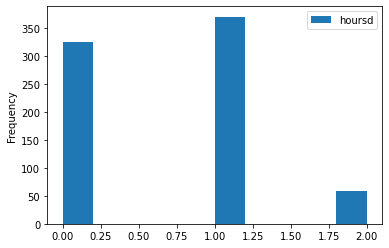

In [5]:
mroz.plot(kind='hist',y='hoursd')

In [6]:
#Note that the Ordered Probit and Logit include and intercept and one less threshold, but the coefficients are the same as in Gretl
mod1=ordinalreg('hoursd~huswage',mroz,typ='probit').fit()
print(mod1.summary())

Optimization terminated successfully.
         Current function value: 0.905043
         Iterations 7
                               oprobit Results                                
Dep. Variable:                      0   Log-Likelihood:                -681.50
Model:                        oprobit   AIC:                             1367.
Method:            Maximum Likelihood   BIC:                             1376.
Date:                Sat, 07 Jan 2023                                         
Time:                        09:23:42                                         
No. Observations:                 753                                         
Df Residuals:                     751                                         
Df Model:                           1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3678      0.

In [7]:
mod2=ordinalreg('hoursd~huswage',mroz,typ='logit').fit()
print(mod2.summary())

Optimization terminated successfully.
         Current function value: 0.905625
         Iterations 8
                                ologit Results                                
Dep. Variable:                      0   Log-Likelihood:                -681.94
Model:                         ologit   AIC:                             1368.
Method:            Maximum Likelihood   BIC:                             1377.
Date:                Sat, 07 Jan 2023                                         
Time:                        09:23:42                                         
No. Observations:                 753                                         
Df Residuals:                     751                                         
Df Model:                           1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5756      0.

In [8]:
m1,a1=mfx(mod1,typ='probit')
print(m1)
print('\nAverage Marginal Effects')
print(a1)

probit marginal effects
               0         1         2
huswage  0.01023 -0.006516 -0.003714

Average Marginal Effects
huswage   -0.013945
dtype: float64


In [9]:
m2,a2=mfx(mod2,typ='logit')
print(m2)
print('\nAverage Marginal Effects')
print(a2)

logit marginal effects
                0         1         2
huswage  0.009738 -0.006935 -0.002804

Average Marginal Effects
huswage   -0.012542
dtype: float64


# Session 19 Interactive

In [10]:
affairs=woo.data('affairs')
woo.data('affairs',description=True)

name of dataset: affairs
no of variables: 19
no of observations: 601

+----------+------------------------------------------------------------------------------+
| variable | label                                                                        |
+----------+------------------------------------------------------------------------------+
| id       | identifier                                                                   |
| male     | =1 if male                                                                   |
| age      | in years                                                                     |
| yrsmarr  | years married                                                                |
| kids     | =1 if have kids                                                              |
| relig    | 5 = very relig., 4 = somewhat, 3 = slightly, 2 = not at all, 1 = anti        |
| educ     | years schooling                                                              |
| occup   

In [11]:

f='ratemarr~yrsmarr+age+male'
mod3a=ols(f,affairs).fit()
print(mod3a.summary())

                            OLS Regression Results                            
Dep. Variable:               ratemarr   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     12.56
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           5.66e-08
Time:                        09:23:43   Log-Likelihood:                -892.90
No. Observations:                 601   AIC:                             1794.
Df Residuals:                     597   BIC:                             1811.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3914      0.182     24.180      0.0

In [12]:

f='ratemarr~yrsmarr+age+male'
mod3=ordinalreg(f,affairs,typ='probit').fit()
print(mod3.summary())

Optimization terminated successfully.
         Current function value: 1.326758
         Iterations 6
                               oprobit Results                                
Dep. Variable:                      0   Log-Likelihood:                -797.38
Model:                        oprobit   AIC:                             1603.
Method:            Maximum Likelihood   BIC:                             1620.
Date:                Sat, 07 Jan 2023                                         
Time:                        09:23:44                                         
No. Observations:                 601                                         
Df Residuals:                     597                                         
Df Model:                           3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4949      0.

In [13]:
m3,a3=mfx(mod3,typ='probit')
print(m3)
print('\nAverage Marginal Effects')
print(a3)

probit marginal effects
                0         1         2         3         4
yrsmarr  0.002527  0.007458  0.006159  0.002048 -0.018192
age      0.000140  0.000412  0.000340  0.000113 -0.001005
male     0.001145  0.003379  0.002790  0.000928 -0.008242

Average Marginal Effects
yrsmarr   -0.046847
age       -0.002589
male      -0.021224
dtype: float64


In [14]:
f='ratemarr~yrsmarr+age+male'
mod4=ordinalreg(f,affairs,typ='logit').fit()
print(mod4.summary())

Optimization terminated successfully.
         Current function value: 1.328532
         Iterations 9
                                ologit Results                                
Dep. Variable:                      0   Log-Likelihood:                -798.45
Model:                         ologit   AIC:                             1605.
Method:            Maximum Likelihood   BIC:                             1622.
Date:                Sat, 07 Jan 2023                                         
Time:                        09:23:44                                         
No. Observations:                 601                                         
Df Residuals:                     597                                         
Df Model:                           3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4802      0.

In [15]:
m4,a4=mfx(mod4,typ='logit')
print(m4)
print('\nAverage Marginal Effects')
print(a4)

logit marginal effects
                0         1         2         3         4
yrsmarr  0.001886  0.007026  0.007202  0.002704 -0.018818
age      0.000071  0.000264  0.000271  0.000102 -0.000708
male     0.001813  0.006754  0.006924  0.002600 -0.018091

Average Marginal Effects
yrsmarr   -0.045730
age       -0.001720
male      -0.043962
dtype: float64
